# WWW-UDEMY-DOWNLOADER

Originally created by Jansen Simanullang

June 2018
Medan, North Sumatera, Indonesia

## A. Requirements

### (1) Install Geckodriver
Install Geckodriver from : https://github.com/mozilla/geckodriver/releases/

#### Check Geckodriver version

In [1]:
!echo == GECKODRIVER ==:
!geckodriver --version

== GECKODRIVER ==:
geckodriver 0.20.1

The source code of this program is available from
testing/geckodriver in https://hg.mozilla.org/mozilla-central.

This program is subject to the terms of the Mozilla Public License 2.0.
You can obtain a copy of the license at https://mozilla.org/MPL/2.0/.


### (2) Install Some Python Packages

In [2]:
!pip install -q splinter 
!pip install -q --upgrade jupyter_contrib_nbextensions
!pip install -q --upgrade youtube-dl

In [3]:
from splinter import Browser
import os, shutil

## B. Definitions

### B. 1 Some Constants

In [4]:
homepage='https://www.udemy.com'

In [5]:
browser = Browser('firefox', headless = True)

In [6]:
cookie_file = 'cookies.txt'

In [7]:
initial_dirname = os.getcwd()

### B.2 Helper Functions

In [8]:
def screenshot():
    browser.driver.save_screenshot('screenshot.png')
    from PIL import Image
    return Image.open('screenshot.png')

In [9]:
import base64

credential_file = 'udemy.json'

def encode_cjson(text):
    return base64.b64encode(bytes(str(text), "utf-8"))

def save_cjson(text):
    text = encode_cjson(text)
    with open(credential_file,'wb+') as f:
        f.write(bytes(str(text),"utf-8"))
    f.close()

def read_cjson():
    import os
    if os.path.isfile(credential_file):
        with open(credential_file,'rb') as f:
            a = f.read()
        f.close()
    else:
        print('credential file not found')
    return str(a).split("'")[1]

def decode_cjson(text):
    return str(base64.b64decode(text)).split("'")[1]

def get_cjson():
    import json
    text = read_cjson()
    
    uid = json.loads(decode_cjson(text))
    return uid

def remove_cjson():
    import os
    if os.path.isfile(credential_file):
        os.remove(credential_file)

def get_credential():
    import getpass, os
    if os.path.isfile(credential_file):
        username = get_cjson()['user']
        password = get_cjson()['password']
    else:
        username = input('User Name:')
        password = getpass.getpass('Password:')
        text = '{"user":"'+username+'", "password":"'+password+'"}'
        save_cjson(text)
        
    return username, password

def remove_credential():
    remove_cjson()
    print('credential removed...')
    return

def reset_credential():
    remove_cjson()
    username, password = get_credential()
    return username, password

In [10]:
def download_from_udemy(playlist_start=1, **kvargs):
    
    download_dirname = course_titles[choice-1]
    try:
        os.mkdir(download_dirname)
    except:
        pass
    try:
        if os.path.isfile(cookie_file):
            os.remove(cookie_file)
            shutil.move(os.path.join(os.getcwd(), cookie_file), os.path.join(os.getcwd(), download_dirname), cookie_file)    
    except:
        pass

    os.chdir(download_dirname)
    download_command = 'youtube-dl --ignore-errors -o "%(playlist_index)s-%(title)s.%(ext)s" --cookies cookies.txt '+course_homepage
    if playlist_start:
        download_command += ' --playlist-start='+str(playlist_start) + ' --all-subs'
        
      
    print(download_command)
    print()
    downloader = open('downloader.sh','w')
    downloader.write(download_command)
    downloader.close()

    !chmod +x downloader.sh
    !./downloader.sh

    os.chdir(initial_dirname)

## C. Udemy
### Login Page

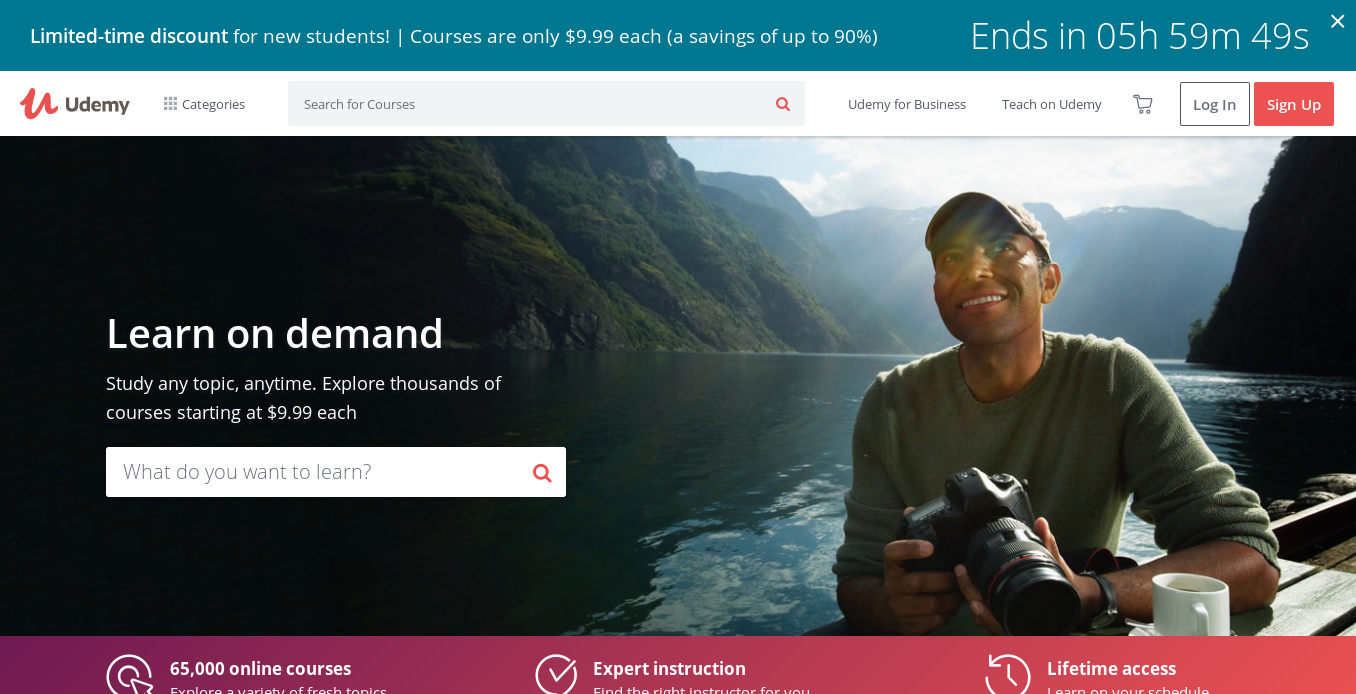

In [11]:
browser.visit('https://www.udemy.com/')
screenshot()

### Insert Login Credential

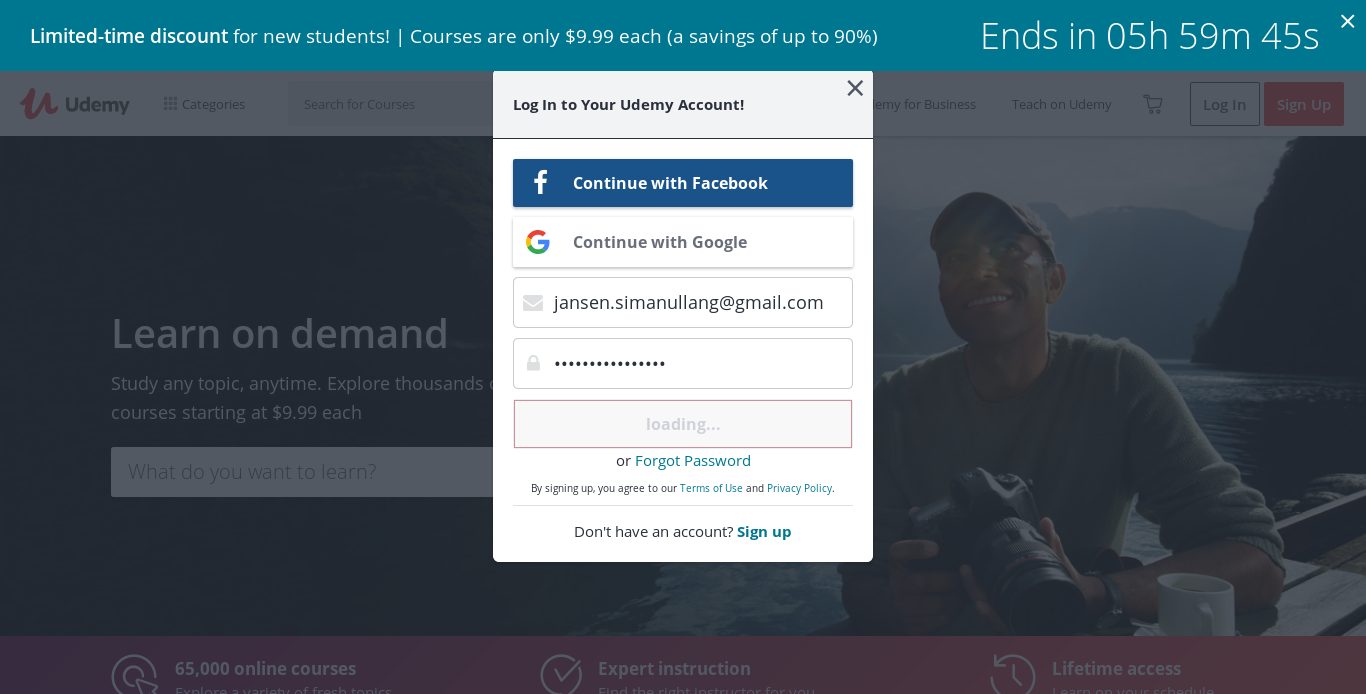

In [12]:
browser.find_by_text('Log In').click()
username, password = get_credential()
browser.fill('email', username)
browser.fill('password', password)
browser.find_by_name('submit').click()
screenshot()

### LIST COURSES

1) Machine Learning A-Z™: Hands-On Python & R In Data Science
2) Deep Learning and Computer Vision A-Z™: OpenCV, SSD & GANs
3) Deep Learning and NLP A-Z™: How to create a ChatBot
4) Artificial Intelligence A-Z™: Learn How To Build An AI
5) Deep Learning A-Z™: Hands-On Artificial Neural Networks
6) Critical Thinking and Politics
7) Mastering the Google Chrome Developer Tools
8) Build A Responsive Website From Scratch
9) Trademarks in Plain English. Trademark Law for startups.
10) Hadoop Big Data - Must See Introduction to Big Data
11) Big Data and Hadoop Essentials
12) Learn 30 New Things In 30 Days!


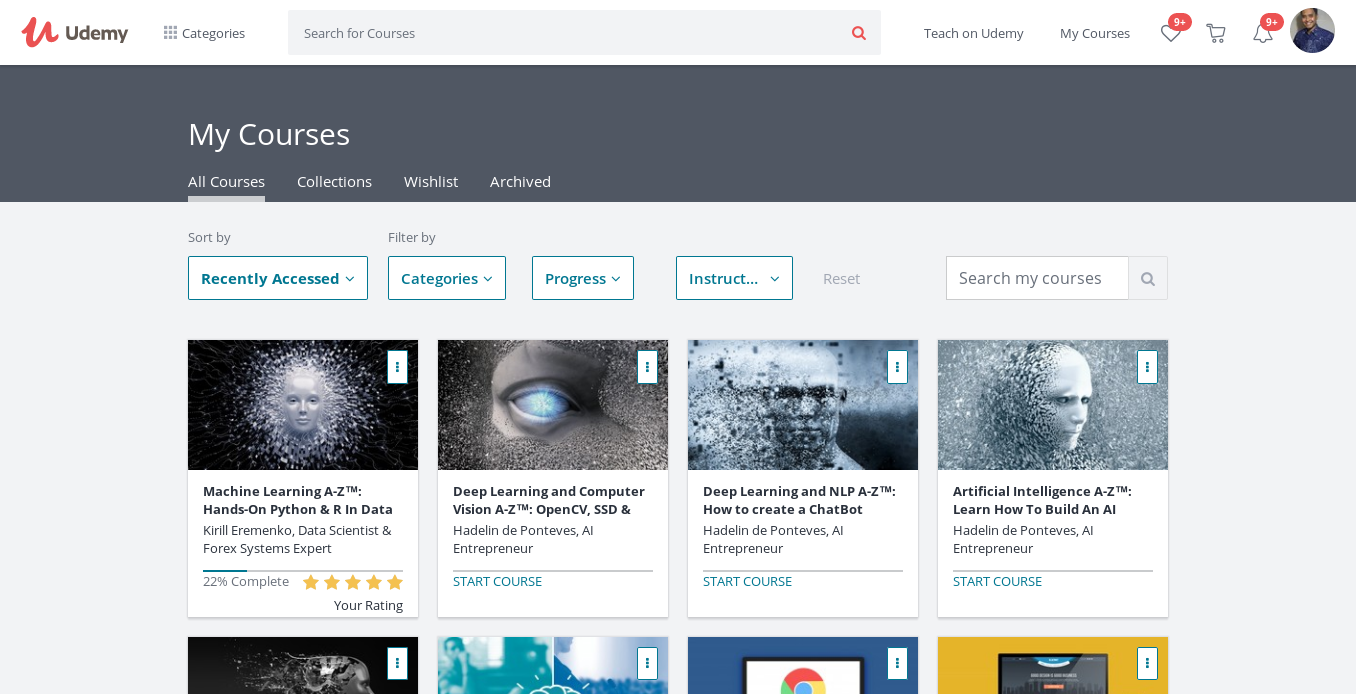

In [13]:
browser.visit('https://www.udemy.com/home/my-courses/learning/')
cards = browser.find_by_css('div.card')
course_urls = []
course_titles = []
for i, card in enumerate(cards):
    title = card.find_by_tag('strong')[0].text
    print(str(i+1)+') '+ title)
    course_titles.append(title)
    course_urls.append(card.find_by_tag('a')['href'])
screenshot()

There are `{{i+1}}` courses visible in this page. Choose from number `1` to `{{i+1}}`.

## Edit Choice Here

In [14]:
choice = 1

## COURSE: {{course_titles[choice-1]}}

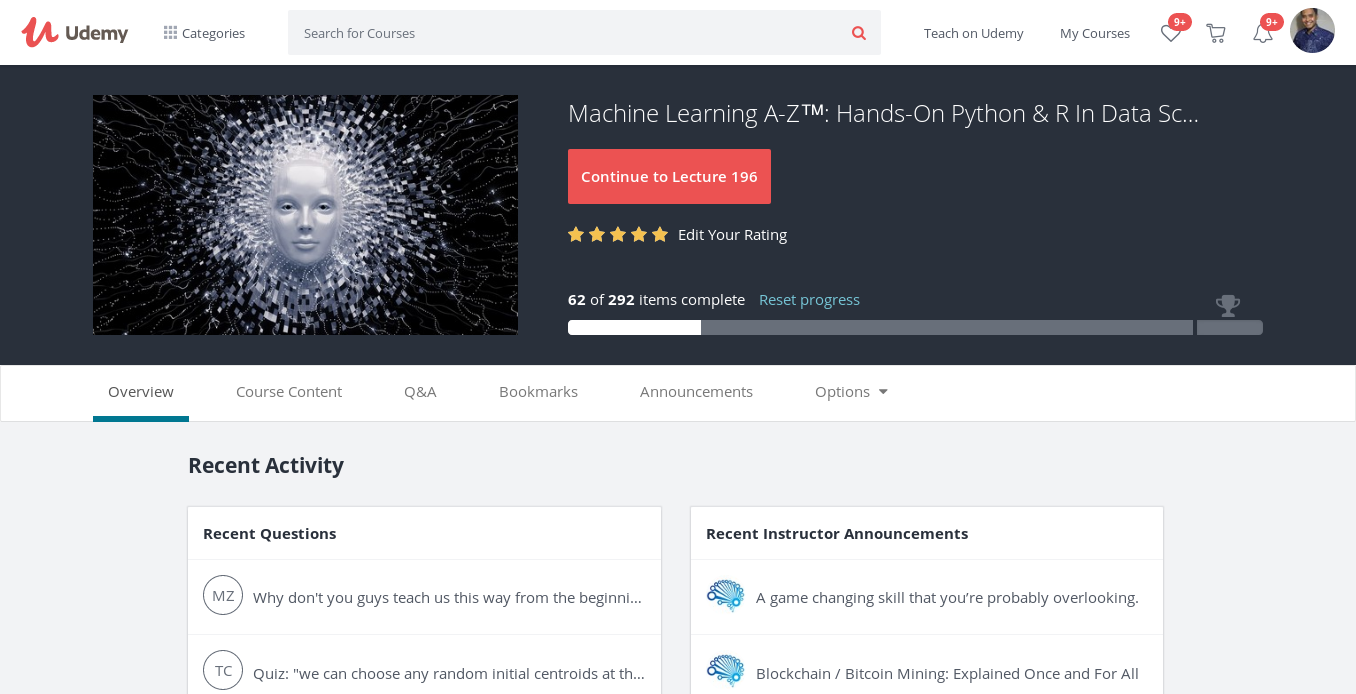

In [15]:
browser.visit(course_urls[choice-1])
course_homepage = browser.driver.current_url
course_homepage = homepage +'/' +course_homepage.split('/')[3]+'/learn'
browser.visit(course_homepage)
screenshot()

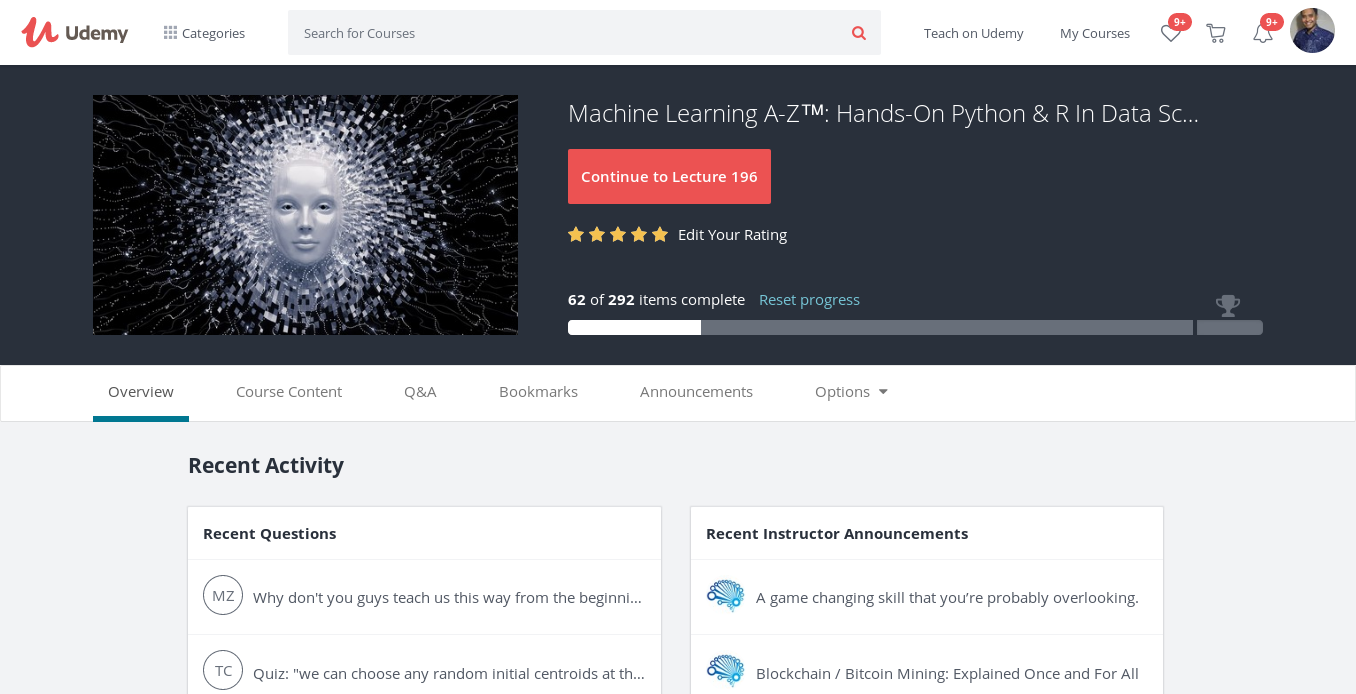

In [16]:
browser.visit('https://www.udemy.com/cart/checkout/express/course/950390/?discountCode=1806V06NVDHYB10')
screenshot()

### Downloading with `youtube-dl` and cookies.txt

`youtube-dl` command format:

```
youtube-dl -o "%(playlist_index)s-%(title)s.%(ext)s" --cookies cookies.txt https://www.udemy.com/machinelearning
```


In [17]:
%%bash -s "$cookie_file"
./cookiefire > $1

In [18]:
download_from_udemy(playlist_start=1)

youtube-dl --ignore-errors -o "%(playlist_index)s-%(title)s.%(ext)s" --cookies cookies.txt https://www.udemy.com/machinelearning/learn --playlist-start=1 --all-subs

[udemy:course] machinelearning: Downloading webpage
[udemy:course] 950390: Downloading course curriculum
[download] Downloading playlist: Machine Learning A-Z™: Hands-On Python & R In Data Science
[udemy:course] playlist Machine Learning A-Z™: Hands-On Python & R In Data Science: Collected 261 video ids (downloading 261 of them)
[download] Downloading video 1 of 261
[udemy] 6087180: Downloading webpage
[udemy] 6087180: Downloading lecture JSON
[udemy] 7236256: Downloading m3u8 information
[download] 001-Applications of Machine Learning.mp4 has already been downloaded
[download] 100% of 11.53MiB
[ffmpeg] Fixing malformed AAC bitstream in "001-Applications of Machine Learning.mp4"
[download] Downloading video 2 of 261
[udemy] 6087182: Downloading webpage
[udemy] 6087182: Downloading lecture JSON
[udemy] 7236304: Downloading 

[download] 019-Simple Linear Regression in Python - Step 2.mp4 has already been downloaded
[download] 100% of 138.40MiB
[ffmpeg] Fixing malformed AAC bitstream in "019-Simple Linear Regression in Python - Step 2.mp4"
[download] Downloading video 20 of 261
[udemy] 5742774: Downloading webpage
[udemy] 5742774: Downloading lecture JSON
[udemy] 6810574: Downloading m3u8 information
[info] Writing video subtitles to: 020-Simple Linear Regression in Python - Step 3.en_US.vtt
[download] 020-Simple Linear Regression in Python - Step 3.mp4 has already been downloaded
[download] 100% of 117.68MiB
[ffmpeg] Fixing malformed AAC bitstream in "020-Simple Linear Regression in Python - Step 3.mp4"
[download] Downloading video 21 of 261
[udemy] 5768342: Downloading webpage
[udemy] 5768342: Downloading lecture JSON
[udemy] 6847736: Downloading m3u8 information
[info] Writing video subtitles to: 021-Simple Linear Regression in Python - Step 4.en_US.vtt
[download] 021-Simple Linear Regression in Python - 

[udemy] 5789342: Downloading lecture JSON
[udemy] 6871248: Downloading m3u8 information
[info] Writing video subtitles to: 038-Multiple Linear Regression in Python - Backward Elimination - Homework Solution.en_US.vtt
[download] 038-Multiple Linear Regression in Python - Backward Elimination - Homework Solution.mp4 has already been downloaded
[download] 100% of 54.26MiB
[download] Downloading video 39 of 261
[udemy] 5734722: Downloading webpage
[udemy] 5734722: Downloading lecture JSON
[udemy] 6797340: Downloading m3u8 information
[info] Writing video subtitles to: 039-Multiple Linear Regression in R - Step 1.en_US.vtt
[download] 039-Multiple Linear Regression in R - Step 1.mp4 has already been downloaded
[download] 100% of 114.54MiB
[ffmpeg] Fixing malformed AAC bitstream in "039-Multiple Linear Regression in R - Step 1.mp4"
[download] Downloading video 40 of 261
[udemy] 5734728: Downloading webpage
[udemy] 5734728: Downloading lecture JSON
[udemy] 6797348: Downloading m3u8 information

ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 58 of 261
[udemy] 5952220: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 59 of 261
[udemy] 5846958: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure y

ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 78 of 261
[udemy] 5728846: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 79 of 261
[udemy] 5858514: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure y

ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 98 of 261
[udemy] 6683162: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 99 of 261
[udemy] 5749372: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure y

ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 118 of 261
[udemy] 5773388: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 119 of 261
[udemy] 5798784: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure

ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 138 of 261
[udemy] 5685614: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 139 of 261
[udemy] 5685616: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure

ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 158 of 261
[udemy] 5997012: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 159 of 261
[udemy] 6022152: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure

ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 178 of 261
[udemy] 6059444: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 179 of 261
[udemy] 6065884: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure

ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 198 of 261
[udemy] 6760390: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 199 of 261
[udemy] 6760392: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure

ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 218 of 261
[udemy] 6761138: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 219 of 261
[udemy] 6761140: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure

ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 238 of 261
[udemy] 6683192: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 239 of 261
[udemy] 6270772: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure

ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 258 of 261
[udemy] 6683214: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
[download] Downloading video 259 of 261
[udemy] 6305682: Downloading webpage
ERROR: Unable to download webpage: HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>); please report this issue on https://yt-dl.org/bug . Make sure

### ATTENTION:
In case you got 

`HTTP 403 ERROR` 

or 

`ERROR: Course xxxxxx is not free. You have to pay for it before you can download. Use this URL to confirm purchase: https://www.udemy.com/cart/checkout/express/course/xxxxxx/?discountCode=ddddddddddddd`:
  - your cookie might be expired
  - open Firefox and make some streaming video activities to regenerate the cookies
  - export cookies to file: cookies.txt
      - using `cookiefire`
      - using `Cookies.txt` Browser Extensions:
          - [`Cookies.txt for Firefox Browser`](https://addons.mozilla.org/en-US/firefox/addon/cookies-txt/)
          - [`Cookies.txt for Chrome Browser`](https://chrome.google.com/webstore/detail/cookiestxt/njabckikapfpffapmjgojcnbfjonfjfg)
  
  - repeat the `download_from_udemy(playlist_start)` 
    where `playlist-start`= `your_last_video_squence`, 
       - for example when you want to download 261 videos but interrupted at 188 then you can set `playlist-start=188`

### Close browser

In [19]:
browser.quit()

### check if there is still process running

In [20]:
!ps -aux | grep youtube-dl

bri      12920  0.0  0.0   4504   784 pts/1    Ss+  21:58   0:00 /bin/sh -c ps -aux | grep youtube-dl
bri      12922  0.0  0.0   4504    92 pts/1    D+   21:58   0:00 /bin/sh -c ps -aux | grep youtube-dl
